# AI Adoption and Layoffs: Linear Regression

In this notebook we investigate whether there is a linear relationship between the level of AI adoption in firms (independent variable) and the number of layoffs (dependent variable). 

Because real data are not available to us, we generate a synthetic but realistic dataset: firms with higher AI adoption may experience more layoffs due to automation, but we also allow for randomness (idiosyncratic firm-level factors).


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# for reproducibility
np.random.seed(42)

## 1. Data generation

We simulate a cross-sectional dataset of firms.  
- `AI_Adoption` is a score between 0 and 100.  
- `Layoffs` is generated to increase on average with AI adoption, but with noise to avoid a perfect linear pattern.


In [2]:
# number of firms
n_firms = 100

# AI adoption score (0 - 100)
ai_adoption = np.random.uniform(0, 100, n_firms)

# layoffs: baseline + effect of AI + noise
# baseline = 20 layoffs, effect = 1.5 per adoption point, noise = N(0, 15)
layoffs = 20 + 1.5 * ai_adoption + np.random.normal(0, 15, n_firms)

# put everything in a DataFrame
df = pd.DataFrame({"AI_Adoption": ai_adoption, "Layoffs": layoffs})

print(df.head())

   AI_Adoption     Layoffs
0    37.454012   77.486724
1    95.071431  158.122036
2    73.199394  131.175503
3    59.865848   79.985239
4    15.601864   40.107718


## 2. Estimation of the linear model

We estimate the following OLS model:

$$
\text{Layoffs}_i = \beta_0 + \beta_1 \text{AI\_Adoption}_i + \varepsilon_i
$$

where:

- $\beta_0$ is the intercept,
- $\beta_1$ measures how many layoffs are associated with a 1-point increase in AI adoption.


In [3]:
# add constant for the intercept
X = sm.add_constant(df["AI_Adoption"])
y = df["Layoffs"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Layoffs   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     968.9
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           1.31e-52
Time:                        11:59:07   Log-Likelihood:                -401.95
No. Observations:                 100   AIC:                             807.9
Df Residuals:                      98   BIC:                             813.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          23.2264      2.554      9.093      

## 3. Visualization

We now plot:
1. the scatter plot of the data (AI adoption vs layoffs),
2. the fitted regression line.

This helps us check visually whether the linear pattern is reasonable.


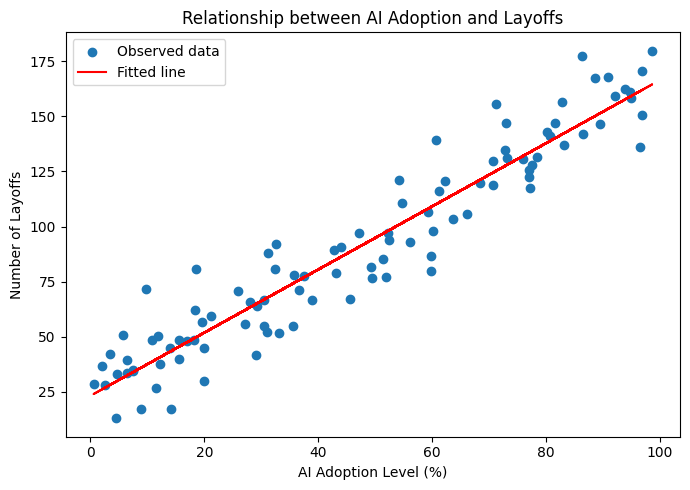

In [4]:
# prediction for the regression line
y_pred = model.predict(X)

plt.figure(figsize=(7, 5))
plt.scatter(df["AI_Adoption"], df["Layoffs"], label="Observed data")
plt.plot(df["AI_Adoption"], y_pred, color="red", label="Fitted line")
plt.xlabel("AI Adoption Level (%)")
plt.ylabel("Number of Layoffs")
plt.title("Relationship between AI Adoption and Layoffs")
plt.legend()
plt.tight_layout()
plt.show()

## 4. Discussion

The estimated coefficient on `AI_Adoption` is expected to be **positive**, because we constructed the data that way. In a real-world application, however, the sign and magnitude of this coefficient would be an empirical question.

**Points to highlight in the report:**
- We used synthetic data to mimic a plausible economic mechanism.
- The linear model suggests that higher AI adoption is associated with higher layoffs.
- The error term captures other firm-specific factors (size, sector, restructuring, macro conditions).
- In a more complete model, we could add control variables to avoid omitted-variable bias.
